# Homework 4 (100 Points)

The goal of this homework is to get practice with classification.

## Exercise 1 (50 Points)

For this question we will re-use the "mnist_784" dataset from Homework 3.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from). **- 5 Points**

In [61]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.8)

b) Train a KNN model (on the training set) with any value of K you want and print out the confusion matrix when predicting the testing set. How well did your model perform? Which classes were most confused? - **5 Points**

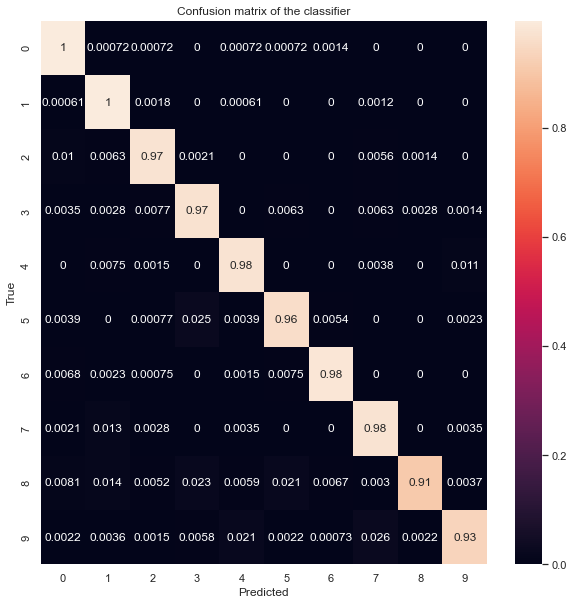

In [133]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

model = KNeighborsClassifier(n_neighbors=2)
# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output
y_pred = model.predict(x_test)
# Constructing the confusion matrix.
cm = confusion_matrix(y_test, y_pred, normalize='true')
 # Plot a confusion matrix
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


After normilization is it obivious that the most confused classes are '8' and '9' with 0.91 and 0.93 scores respectively.

c) For K ranging from 1 to 20:
1. train a KNN on the training data - **3 points**
2. record the training and testing accuracy - **3 points**

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.  **- 5 points**

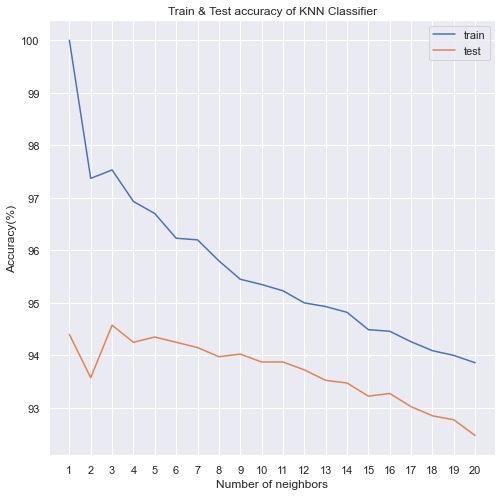

In [134]:
x_train_subset = x_train[:10000]
y_train_subset = y_train[:10000]
x_test_subset = x_test[:4000]
y_test_subset = y_test[:4000]

K = [i for i in range(1,21) ]
train_accuracy = []
test_accuracy = []
for neighbors in K:
    model = KNeighborsClassifier(n_neighbors= neighbors)
    # Train the model using the training sets
    model.fit(x_train_subset,y_train_subset)
    # Calculate train and test accuracy
    train_accuracy.append(accuracy_score(y_train_subset, model.predict(x_train_subset)) * 100)
    test_accuracy.append(accuracy_score(y_test_subset, model.predict(x_test_subset)) * 100)

plt.figure(figsize=(8, 8))
plt.xticks(K,K)
# Plotting both the curves simultaneously
plt.plot(K,train_accuracy, label='train')
plt.plot(K,test_accuracy, label='test')
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy(%)")
plt.title("Train & Test accuracy of KNN Classifier")
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

It is clear from the above diagram that the model having N=3 neighbours has the highest accuracy compared to the others. It should be mentioned that those results are based on a subset of train data in order to be reproducible in a logical time frame.

d) Using the optimal model found in c), plot the confusion matrix and discuss. - **5 points**

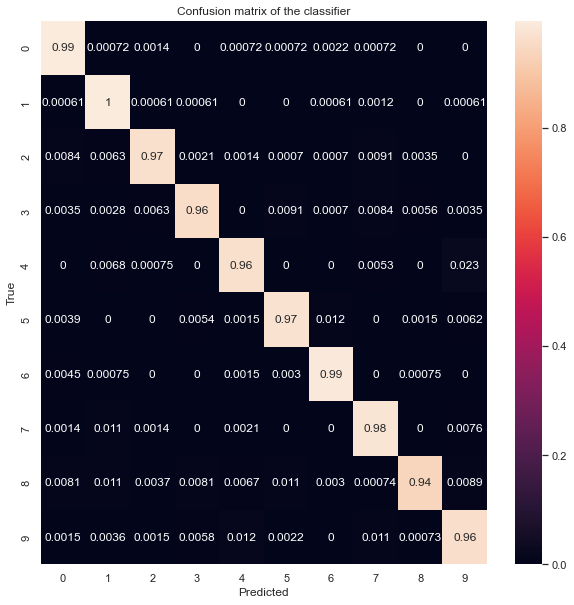

In [135]:
optimal_model = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
optimal_model.fit(x_train,y_train)
#Predict Output
y_pred = optimal_model.predict(x_test)
# Constructing the confusion matrix.
cm = confusion_matrix(y_test, y_pred, normalize='true')
 # Plot a confusion matrix
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

As we can see the more confused classes '8' and '9' have a better score of 0.94 and 0.96 respectively, while all the other classes have a accuracy from 0.96 up to 1. Those results clearly shows that we choose a better model in terms of accuracy compared to the previous one. 

e) Using the entire dataset (training + testing set): Use k-fold cross validation (with k=10) to evaluate the perfomance of your KNN model. By varying K from 1 to 20 as in c), determine the optimal number of neighbors for your KNN model based on the mean cv accuracy. Plot a graph of the training and testing set accuracy (use the mean cv accuracy) as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Discuss similarities or differences with results in c). **- 10 points**

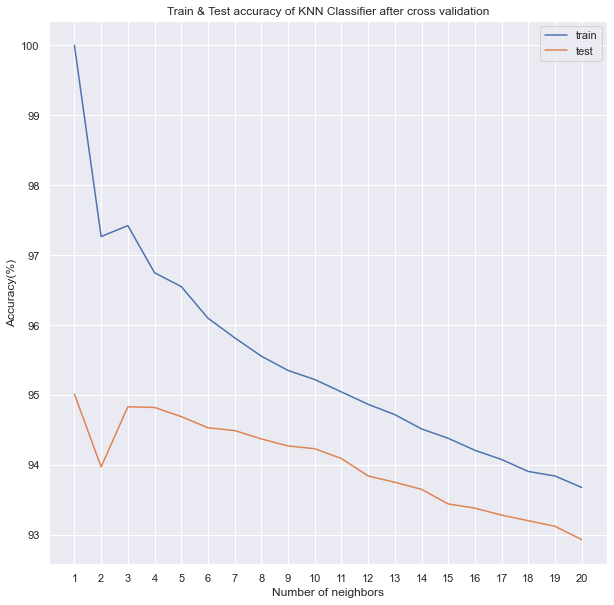

In [136]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

K = [int(i) for i in range(1,21) ]
mean_acc_train_scores = []
mean_acc_test_scores = []
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)  
for neighbors in K:
    model = KNeighborsClassifier(n_neighbors= neighbors)
    # Train the model using the entire dataset
    model.fit(X[:10000],y[:10000]) 
    # evaluate model
    scores = cross_validate(model, X[:10000], y[:10000], cv=cv, return_train_score=True)
    mean_acc_train_scores.append(np.mean(scores['train_score'])*100)
    mean_acc_test_scores.append(np.mean(scores['test_score'])*100)

# Plotting both the curves simultaneously
plt.plot(K,mean_acc_train_scores, label='train')
plt.plot(K,mean_acc_test_scores, label='test')
# Naming the x-axis, y-axis and the whole graph
plt.xticks(K,K)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy(%)")
plt.title("Train & Test accuracy of KNN Classifier after cross validation")
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

f) Using the best model from d), pick an image at random and plot it next to its k nearest neighbors. **- 7 points**

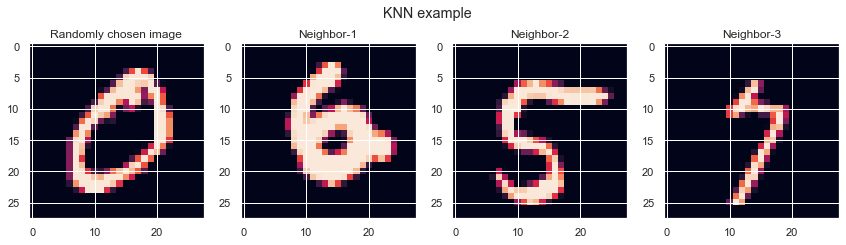

In [139]:
random_choice = 1
image = np.expand_dims(X[random_choice], axis=0)
_, neighbors = optimal_model.kneighbors(image)
# Add the random image and its k nearest neighbors in a list for plotting
plot_list = [X[random_choice].reshape(28,28)]
for neighbor in neighbors[0]:
    plot_list.append(X[neighbor].reshape(28,28))
# Start ploting
fig = plt.figure(figsize = (12,12))
fig.suptitle('KNN example')
for i in range(4):
    ax = plt.subplot(4,4,i+1)
    if i == 0:
        ax.set_title("Randomly chosen image")
    else:
        ax.set_title("Neighbor-"+str(i))
    plt.tight_layout()
    plt.imshow(plot_list[i])

g) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat e) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension. **- 7 points**

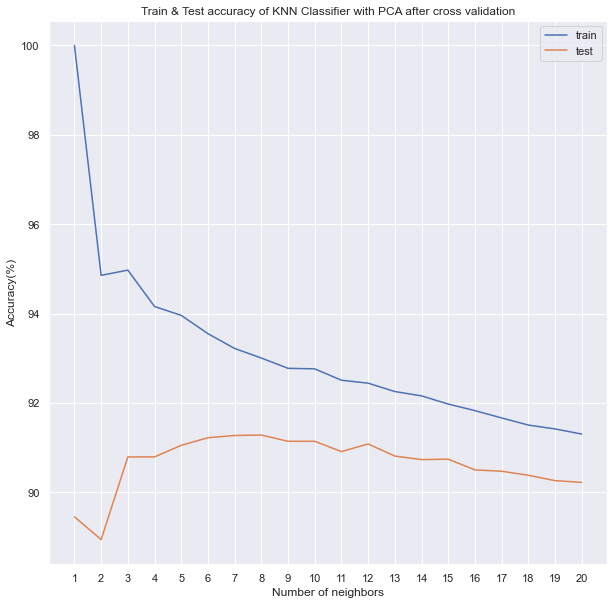

In [140]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA


K = [int(i) for i in range(1,21) ]
mean_acc_train_scores = []
mean_acc_test_scores = []
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)  
for neighbors in K:
    knn_model = KNeighborsClassifier(n_neighbors= neighbors)
    pca = PCA(n_components=10)
    model = make_pipeline(pca, knn_model)
    # Train the model using the entire dataset
    model.fit(X[:10000],y[:10000])
    # evaluate model
    scores = cross_validate(model, X[:10000], y[:10000], cv=cv, return_train_score=True)
    mean_acc_train_scores.append(np.mean(scores['train_score'])*100)
    mean_acc_test_scores.append(np.mean(scores['test_score'])*100)

# Plotting both the curves simultaneously
plt.plot(K,mean_acc_train_scores, label='train')
plt.plot(K,mean_acc_test_scores, label='test')
# Naming the x-axis, y-axis and the whole graph
plt.xticks(K,K)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy(%)")
plt.title("Train & Test accuracy of KNN Classifier with PCA after cross validation")
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

As expected the dimentionality reduction technique(10 dimentions) based on our previous homework will be slightly worse than handling all the 784 dimentions. Therefore, the accuracy of the most well performed models is between 90-92% while the original model accuracy was from 93% to 95%. 

## Exercise 2 (50 points)

This exercise will re-use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data) from homework 1. Download all files this time.

a) Informed by homework 1, handle the missing values in the datasets. Briefly explain. **-5 points**

In [269]:
def drop_na(df):
    column_sum_Nans = df.isnull().sum(axis=0)
    column_index = column_sum_Nans.index[column_sum_Nans > 200]
    return df.drop(column_index, axis= 1)

def replace_with_mean(df):
    mean = df['Age'].mean()
    df['Age'] = df['Age'].fillna(value=mean)
    return df['Age']

# Read the file 
df = pd.read_csv('train.csv') 
# Drop columns with more than 200 NaN values
df = drop_na(df)
# Replace with the mean the missing ages
df['Age'] = df['Age'].interpolate()
# Replace with the mean the missing fares
df['Fare'] = df['Fare'].interpolate()
# Remove rows with NaN values in 'Embarked' column
df = df[df['Embarked'].notna()]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Age -> Replace the missing values with the mean value of the rest elements of the column as suggested in a previous homework. <br /> 
Fare -> Replace the missing values with the mean value of the rest elements of the column. <br /> 
Embarked -> There were only 2 rows with missing values so I decided to remove them. <br /> 
Cabin -> Over 200 missing values so I removed the whole row as suggested in a previous homework.

b) Informed by homework 1, add 2 new features / columns to the datasets that you think might be related to the survival of individuals. Explain. **-5 points**

In [270]:
from sklearn import preprocessing

def extract_names(df):
    # Remove parenthesis from name column
    new_df = df["Name"].str.replace(r"\(.*\)","")
    # Get Last Name
    new_df = new_df.str.split(",", n=1, expand=True)
    df["Last Name"] = new_df[0]
    # Get Title
    new_df = new_df[1].str.split(". ", n=1, expand=True)
    df["Title"] = new_df[0]
    return df[['Last Name', 'Title']]


# Add title and last name to dataframe
df[['Last Name', 'Title']] = extract_names(df)

df.head()

/var/folders/bh/lvn75fgs5z703r985tw80gvr0000gn/T/ipykernel_67685/146486716.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df = df["Name"].str.replace(r"\(.*\)","")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,Mr


Following the subquestions of homework 1 for Titanic dataset, the added columns were 'Name', 'Last Name' and 'Title'. For 'Title' column we plot a diagram showing the purposion of surving people or not and the results where not uniform, so it is useful to have. On the other hand, the 'Last Name' column is more distinguishable than the personal 'Name' so that's the reason I chose it. All the other columns already exists in the dataframe. 

c) Train a Decision Tree Classifier using all features you think may be related to survival (justify any that you remove). Set the `max_depth` parameter to an appropriate quantity to reduce the runtime and avoid overfitting. Explain. **- 10 points**

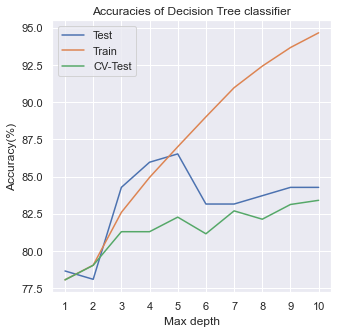

The model with max depth = 5 has the highest test accuracy with 86.52%


In [271]:
from sklearn.tree import DecisionTreeClassifier

def to_numerical(df):
    df.replace({'male': 0, 'female': 1}, inplace=True)
    return df['Sex']

# Get the labels
final_y = df[['Survived']]
df = df.drop(columns=['PassengerId', 'Name','Ticket','Survived'])
# Turn Sex column values to numerical
df['Sex'] = to_numerical(df)
# One hot encoding Embarked, Last Name and Title columns
df["Embarked"] = df["Embarked"].astype("category")
df["Title"] = df["Title"].astype("category")
df["Last Name"] = df["Last Name"].astype("category")
embarked = pd.get_dummies(df['Embarked'])
title = pd.get_dummies(df['Title'])
last_name = pd.get_dummies(df['Last Name'])
df = pd.concat([df, embarked, title, last_name], axis=1)
df = df.drop(columns=['Embarked', 'Title','Last Name'])
final_X =df

# Train Decision Tree classfier
x_train, x_test, y_train, y_test = train_test_split(final_X, final_y, random_state=1, test_size=0.2)
acc_test_scores = []
mean_acc_test_CV_scores = []
mean_acc_train_CV_scores = []
max_depths = range(1,11)
for i in max_depths:
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(x_train, y_train)
    # Prepare the cross-validation procedure
    cv = KFold(n_splits=10, random_state=1, shuffle=True)   
    # Evaluate model
    scores = cross_validate(model, x_train, y_train, cv=cv, return_train_score=True)
    acc_test_scores.append((accuracy_score(y_test, model.predict(x_test)) * 100).__round__(2))
    mean_acc_train_CV_scores.append((scores['train_score'].mean()*100).__round__(2))
    mean_acc_test_CV_scores.append((scores['test_score'].mean()*100).__round__(2))

# Plotting both the curves simultaneously
plt.plot(max_depths, acc_test_scores, label='Test')
plt.plot(max_depths, mean_acc_train_CV_scores, label='Train')
plt.plot(max_depths, mean_acc_test_CV_scores, label='CV-Test')
# Naming the x-axis, y-axis and the whole graph
plt.xticks(max_depths,max_depths)
plt.xlabel("Max depth")
plt.ylabel("Accuracy(%)")
plt.title("Accuracies of Decision Tree classifier")
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()
print("The model with max depth = {} has the highest test accuracy with {}%".format(5,acc_test_scores[4]))

As we can see through the diagram, the depth of 5 is the ideal depth for the following reasons.<br>
- Increasing the depth the training is obviously overfeated.
- Increasing the depth the testing accuracies both for cross-validation testing dataset and test dataset, drop.
- Decreasing the depth  the testing accuracies both for cross-validation testing dataset and test dataset, is not yet in its highest value.

d) Plot the decision tree. Briefly explains how it works. **- 5 points**

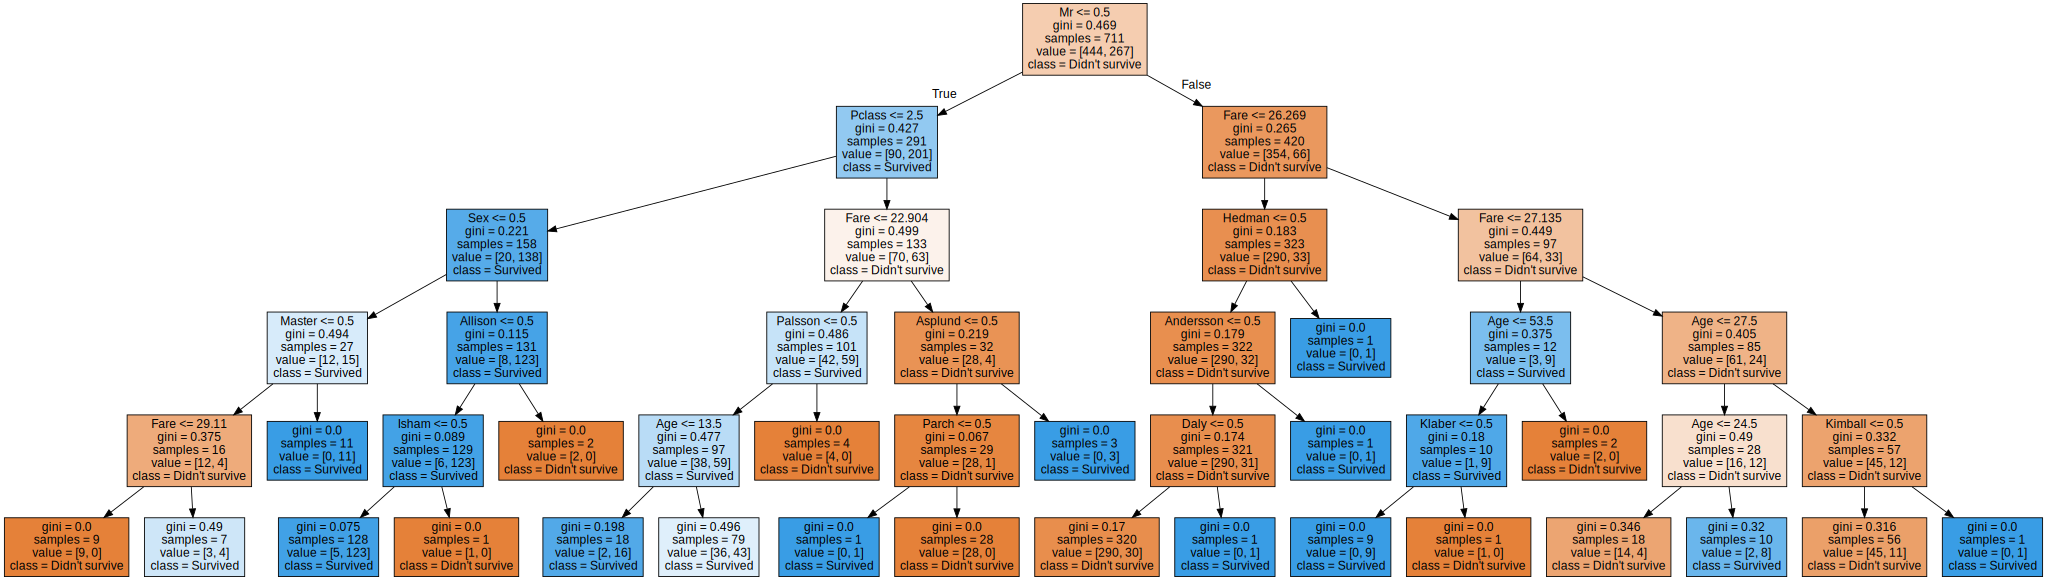

In [329]:
import sklearn.tree as tree
import graphviz
from IPython.display import display

model = DecisionTreeClassifier(max_depth = 5)
model.fit(x_train, y_train)
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=final_X.columns,
                                class_names=["Didn't survive",'Survived'],
                                filled=True)
# Visualize the tree
graph = graphviz.Source(dot_data, format="png")
graph

As you can see, in each square there is a column name and a threshold. If the logical expression is true you go left and if it is false you go right. At the end you will, reach into a leaf with a label attached. This is your prediction. More technical, a decision boundary is decided by testing all the possible decision boundaries splitting the dataset and choosing the one that minimizes the Gini impurity of the two splits. Gini impurity is a metric that measures the probability from a randomly chosen element to be incorrectly classified.

e) Evaluate the classifier on the test set by plotting the confusion matrix. Comment on the pitfalls of the model (to help: For the examples that were misclassified, choose two at random and walk through the decision tree with their attributes and try to understand why the misclassification occured). **- 10 points**

Example 1: Predicted value 1.0 and y_test value 0.0
Example 1 values:
      Pclass  Sex   Age  SibSp  Parch    Fare  Q   Miss  O'Sullivan
502       3    1  29.0      0      0  7.6292  1      1           1
Example 2: Predicted value 0.0 and y_test value 1.0
Example 2 values:
      Pclass  Sex        Age  SibSp  Parch  Fare  Q   Mrs  O'Brien
186       3    1  31.333333      1      0  15.5  1     1        1


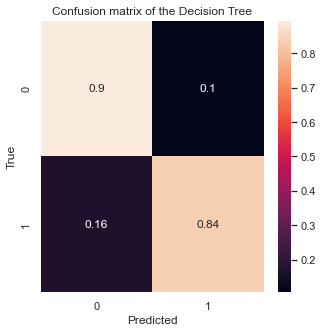

In [283]:
import seaborn as sns 

# Take two misclassed data points
pred_df = pd.DataFrame(model.predict(x_test))
pred_df = pd.concat([pred_df, y_test], axis=1)
example_1_pred = pred_df.iloc[6][0]
example_1_real = pred_df.iloc[6]["Survived"]
example_2_pred = pred_df.iloc[8][0]
example_2_real = pred_df.iloc[8]["Survived"]
print("Example 1: Predicted value {} and y_test value {}".format(example_1_pred,example_1_real))

# Find the dataframe expression of example 1 before one hot encoding

first_5_column  = x_train.iloc[[6,] , :6]
rest_columns = x_train.iloc[[6,],6:]
rest_columns = rest_columns.loc[:, (rest_columns != 0).any(axis=0)]
example_1_df = pd.concat([first_5_column,rest_columns], axis=1)
print("Example 1 values:\n {}".format(example_1_df))


print("Example 2: Predicted value {} and y_test value {}".format(example_2_pred,example_2_real))
first_5_column  = x_train.iloc[[8,] , :6]
rest_columns = x_train.iloc[[8,],6:]
rest_columns = rest_columns.loc[:, (rest_columns != 0).any(axis=0)]
example_2_df = pd.concat([first_5_column,rest_columns], axis=1)
print("Example 2 values:\n {}".format(example_2_df))


# Evaluating the classifier on the test set by plotting the confusion matrix
y_pred = model.predict(x_test)
# Constructing the confusion matrix.
cm = confusion_matrix(y_test, y_pred, normalize='true')
 # Plot a confusion matrix
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Before running the examples let's first discussed about the confussion matrix. As we can see the modelhas a pretty good accuracy finding the 'Not Survived' label equal to 90%. On the other hand, it is not that good finding the 'Survived' label with the accuracy being up to 82%. To run the experiments we took one from each complementary pool both for 'Survived' and 'Not Survived'. 

It should be mentioned that the choice of one hot encoding the 'Title', 'Embarked' and 'Last Name' make as easy to interpret if it is True or False (<=0.5) to continue to the leaves. 

For example 1 if you follow the path: Mr<=0.5 -> Pclass<=2.5 -> Fare <= 22.904 -> Palsson< =0.5 -> Age<= 13.5 -> 'Survived' The issue is that the last decision gives 'Survived' either way.

For example 2 if you follow the path: Mr<=0.5 -> Fare <= 26.269 -> Leeni <= 0.5 -> Hosono <= 0.5 -> Sunderland <= 0.5 -> 'Not survived' The issue is that the last decision should have been reversed  and gives 'Survived'.

f) Tune the parameters of the decision tree to improve its performance. Explain what you tried and what you observed. **- 5 points**

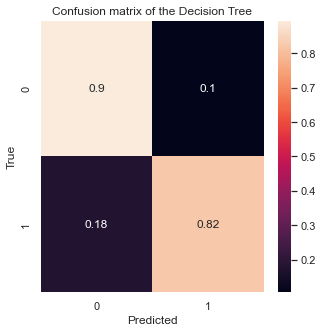

In [320]:
model = DecisionTreeClassifier(max_depth = 5, criterion="entropy", splitter="best", min_impurity_decrease= 0.001, max_features= None)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# Constructing the confusion matrix.
cm = confusion_matrix(y_test, y_pred, normalize='true')
 # Plot a confusion matrix
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

I tried multiple parameters to tune. I kept the max depth stable because of my diagram in 1(c) I know I have made the correct decision based on test accuracy and train overfitting. 
The parameters I choosed are:
- Criterion: Instead of "gini" I used "entropy" with slightly worse results in 'Survived' label (0.84 for 'gini' while 0.82 for 'entropy')
- Splitter: Instead of "best" I used "random" which decreases drasticly the 'Survived' label (0.84 for 'best' while 0.63 for 'random)
- min_impurity_decrease: Instead of 'None' I noticed that only value close to 0.001 give me the initial model accuracy while all others are not interpretable at all. 
- max_features: Instead of "None" I used "auto" (drops 'Survived' to 0.74), "log2" & "sqrt" (drop 'Survived' to 0). 


g) Reduce the dimension of the dataset to 5 before creating a Decision Tree Classifier. Evaluate this classifier by plotting the confusion matrix. Comment on performance differences you observe. How interpretable is this model? Explain. **- 10 points**

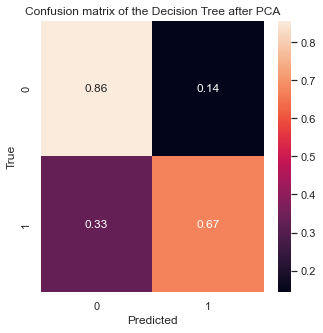

In [273]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
DT_model = DecisionTreeClassifier(max_depth = 5)
model = make_pipeline(pca, DT_model)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# Constructing the confusion matrix.
cm = confusion_matrix(y_test, y_pred, normalize='true')
 # Plot a confusion matrix
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the Decision Tree after PCA')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

As we can see using only 5 dimentions through PCA dimentionality reduction technique, the accuracy drops. Especially, the highest drop is noticed for 'Survived' label. The reason behind that is the choice of those 5 dimentions is not enough to have good accuracy at the end!

# Bonus (40 Points)

## Random Forests
 Random Forest algorithm is an extension to the decision trees. We make use of multiple decision trees to make a decsion(classification/regression) in Random Forests.

Ensemble modelling is a method of constructing a strong model using several weak models. Random Forests algorithm is one such ensemble model

Multiple small decision trees trained on random parts of the training data collectively make a decision on an input point. The number of trees in this Random Forest algorithm is a hyper-parameter that you need to finetune to get the best output from this model. 

Every time you construct a tree, you pick random samples of size 'k'(k samples) from the total dataset and construct the tree. Make sure your tree depth is not very high, or the individual tree could overfit to the data. We want the collective model to generalize well to multiple datasets. 

During classification, we consider the decision of the majority of trees to be the final decision. 

- In this task, you are supposed to construct a random forests algorithm on the 'Titanic' dataset making use of your decision trees from **1c** and get the classification outputs. 
 
 

**Note**: Your are not supposed to use random forests model from sklearn or any other library, but however, you can use those libraries to construct multiple decision trees 

You can use any other library for your convenience, unless you are not trying to load a Random forest model from those libraries. 

### Construct your model (10 points)

In [274]:
from sklearn import tree
import random

# Here is suggested template for you to use
# But feel free to do something different
class Random_Forest():

    def __init__(self, num_trees, max_depth, criterion):
        self.max_depth = max_depth
        self.criterion = criterion
        self.decision_trees = [tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth) for _ in range(num_trees)]

    def _fit_tree(self, X, y, idx):
        return self.decision_trees[idx].fit(X, y)
    
    # Fit the 
    def fit(self, X, y):
        X = X.to_numpy()
        y = y.to_numpy()
        for idx in range(len(self.decision_trees)):
            random_size = int(len(X) * 0.95)
            random_index = np.random.choice(np.arange(len(X)), random_size, replace=False)
            X_sample = X[random_index]
            y_sample = y[random_index]
            self.decision_trees[idx] = self._fit_tree(X_sample, y_sample, idx)
    
    def _majority(self, predictions):
       output = []
       df = pd.DataFrame (predictions)
       for _, columnData in df.iteritems():
            counts = np.bincount(columnData.values)
            output.append(np.argmax(counts))
       return np.asarray(output)

    def predict(self, X_test):
        X_test = X_test.to_numpy()
        predictions = []
        for idx in range(len(self.decision_trees)):
            predictions.append(self.decision_trees[idx].predict(X_test))
        return self._majority(predictions)


### Hyperparameter tuning, and model evaluation for random forests. (25 points)

In order to avoid the cases of overfitting, we apply something called 'pruning' to the decision trees in this algorithm. Pruning is a method to cut the trees beyond a certain depth. This introduces ambiguity and randomness to the output, while increasing the generalization capability. 

 - Experiment with tree sizes(tree depth) of depth = 5,10,15
 - Experiment with different number of trees [10,50,100,500,1000] and report accuracies
 - Experiment with different information criteria ['gini index', 'entropy'] 


Report the accuracy of your best model, and compare it with your accuracy of the decision tree from **1c**. Write your observations on Random Forests algorithm

In [276]:
max_score = 0
optimal_max_depth = 0
optimal_num_trees = 0
optimal_criterion = ''
# Train Random Forest classfier
x_train, x_test, y_train, y_test = train_test_split(final_X, final_y, random_state=1, test_size=0.2)
for max_depth in [5,10,15]:
    for num_trees in [10,50,100,500,1000]:
        for criterion in ['gini','entropy']:
            rf = Random_Forest(num_trees = num_trees,max_depth = max_depth, criterion=criterion)
            rf.fit(x_train,y_train)
            score = (accuracy_score(y_test, rf.predict(x_test)) * 100).__round__(2)
            if max_score < score:
                 max_score = score
                 optimal_max_depth = max_depth
                 optimal_num_trees = num_trees
                 optimal_criterion = criterion
            #print("Random_Forest with num_trees:{} , max_depth:{} , criterion:{} has score of: {}%".format(num_trees,max_depth,criterion,score))
print("Optimal Random_Forest model with num_trees:{} , max_depth:{} , criterion:{} has score of: {}%".format(optimal_num_trees,optimal_max_depth,optimal_criterion,max_score))


Optimal Random_Forest model with num_trees:50 , max_depth:5 , criterion:gini has score of: 87.08%


My observations are the following:
- The accuracy is slightly better (87.08%) than the optimal simple decision tree of 2c (86.52%), which is logical because a possible misclassification could be waived due to the majortity vote of all decision trees. 
- The optimal random forest model is the one with the same max depth(=5) as the optimal simle decision tree of 2c which means that we have correctly choose the best possible choice to avoid overfitting and increase test accuracy as the diagram of 2c depicts.

### Calculations (5 points)

$$ \text{Information gain} = \text{(Entropy of Parent Node)} - \sum_{c}{\text{(entropy of child node)} }$$

$$Entropy = \sum_{i=1}^{C} -p_{i}log(p_{i})$$
$$p_{i} = \frac{C_{i}}{ \sum_{j=1}^{C} C_{j}}$$
$$C_{i} = \text{Count of elements belonging to class 'i'}$$
$$C = \text{Total Number of Elements}$$

We have total data of 50,000 samples

- We randomly sampled about 5000 samples and trained a decision tree. 
- We are trying to classify the samples at a node for one of the tree 'T'
- Parent Node has 34 samples, out of which 15 are positive, and 19 are negative 
- We divided the node based on a particular column, and now we have two child nodes
- Child 1 has 13 samples, of which 9 are positive and 4 are negative
- Child 2 has 21 samples, of which 6 are positive and 15 are negative,

Calculate the information gain for splitting the parent note based on that column

**Note:** You can attach a handwritten image for this part or write your answer in the markdown cell below. 
